Dataset loaded. Shape: (150, 5)
First few rows:
    sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Training data shape: (120, 4) (120,)
Validation data shape: (30, 4) (30,)

Model Evaluation:

Logistic Regression:
Accuracy: 0.8000
Confusion Matrix:
[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]

KNN:
Accuracy: 0.9000
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]

Decision Tree:
Accuracy: 0.9000
Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]


C:\Users\marca\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Random Forest:
Accuracy: 0.8667
Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]

SVM:
Accuracy: 0.8667
Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]

Naive Bayes:
Accuracy: 0.8333
Confusion Matrix:
[[7 0 0]
 [0 9 3]
 [0 2 9]]


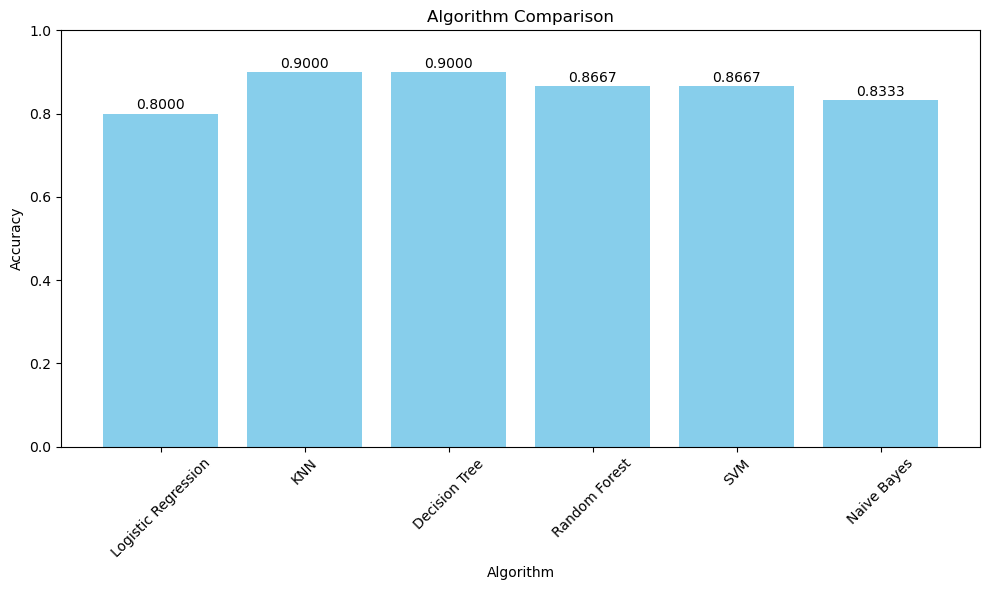


Summary of accuracies:
Logistic Regression: 0.8000
KNN: 0.9000
Decision Tree: 0.9000
Random Forest: 0.8667
SVM: 0.8667
Naive Bayes: 0.8333


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Load the Iris dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, header=None, names=column_names)
print("Dataset loaded. Shape:", df.shape)
print("First few rows:\n", df.head())

# Step 2: Split the data into features (X) and target (y)
X = df.drop('class', axis=1)  # Features: 4 columns
y = df['class']               # Target: class column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print("\nTraining data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_test.shape, y_test.shape)

# Step 3: Build and train models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Naive Bayes', GaussianNB())
]

# Train each model and store results
results = []
names = []
confusion_matrices = []

print("\nModel Evaluation:")
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)
    names.append(name)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    # Print results
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{cm}")

# Step 4: Compare accuracy and plot
plt.figure(figsize=(10, 6))
plt.bar(names, results, color='skyblue')
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy range [0, 1]
plt.xticks(rotation=45)
for i, v in enumerate(results):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')  # Add accuracy labels on bars
plt.tight_layout()
plt.show()

# Summary
print("\nSummary of accuracies:")
for name, acc in zip(names, results):
    print(f"{name}: {acc:.4f}")